<a href="https://colab.research.google.com/github/antonionipo/Modelos-de-Classifica-o-com-Python/blob/main/Metrics/Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import os
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split

In [2]:
%pip install scikit-learn==1.0.2

import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Loading the Data

In [3]:
df_abt = pd.read_excel('churn_data.xlsx')
df_abt.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_abt["TotalCharges"] = pd.to_numeric(df_abt["TotalCharges"],errors='coerce')

In [5]:
df_abt = df_abt.dropna()

In [6]:
df_abt.dtypes

,0
customerID,object
tenure,int64
PhoneService,object
Contract,object
PaperlessBilling,object
PaymentMethod,object
MonthlyCharges,float64
TotalCharges,float64
Churn,object


# Train-Test Split

In [7]:
cat_vars = ['PhoneService',"Contract","PaperlessBilling","PaymentMethod"]
num_vars = ["tenure","MonthlyCharges","TotalCharges"]
modeling_vars = cat_vars + num_vars

In [8]:
X = df_abt.filter(modeling_vars).copy()
y = df_abt['Churn'].copy()
y = pd.DataFrame(y)

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y.Churn)
y.Churn = le.transform(y.Churn)

In [10]:
X = pd.get_dummies(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Feature Engineering

In [12]:
X_train

,tenure,MonthlyCharges,TotalCharges,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
1641,72,87.10,6230.10,False,True,False,False,True,False,True,True,False,False,False
2054,2,49.40,106.55,False,True,True,False,False,False,True,False,False,True,False
2104,8,85.20,627.40,False,True,True,False,False,False,True,False,True,False,False
2973,62,100.15,6283.30,False,True,True,False,False,False,True,False,False,True,False
2864,4,63.75,226.20,False,True,True,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,22,69.25,1554.00,False,True,True,False,False,False,True,False,False,True,False
4996,47,74.05,3496.30,False,True,False,False,True,True,False,False,False,False,True
4159,59,89.75,5496.90,False,True,True,False,False,False,True,False,False,True,False
4324,40,67.45,2731.00,False,True,True,False,False,True,False,False,False,True,False


In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
lr = model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
lr.predict(X_test)

array([0, 1, 0, ..., 0, 1, 1])

In [15]:
X_test.assign(churn = y_test).assign(label = lr.predict(X_test))

,tenure,MonthlyCharges,TotalCharges,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,churn,label
4192,23,20.15,405.60,False,True,False,True,False,True,False,True,False,False,False,0,0
4648,2,70.30,144.00,False,True,True,False,False,False,True,False,False,True,False,0,1
788,24,78.40,1832.40,False,True,False,True,False,True,False,False,False,True,False,0,0
2300,48,103.25,5037.55,False,True,False,True,False,False,True,False,True,False,False,1,0
2722,32,18.95,613.95,False,True,False,False,True,True,False,False,False,False,True,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,1,29.90,29.90,True,False,True,False,False,True,False,False,False,False,True,0,0
6310,60,44.45,2773.90,True,False,False,True,False,False,True,False,False,True,False,0,0
6746,4,56.50,235.10,False,True,True,False,False,True,False,False,False,False,True,1,0
6930,3,75.15,216.75,False,True,True,False,False,False,True,False,True,False,False,1,1


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


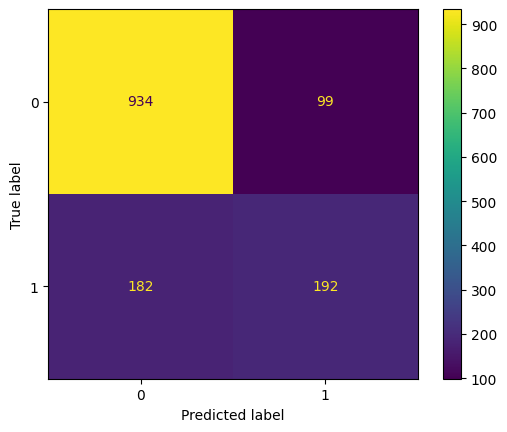

In [16]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, X_test, y_test, values_format='d');

In [17]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.7891180654338549
Acurácia (Teste): 0.8002842928216063
Acurácia Balanceada (Treino): 0.696153238655371
Acurácia Balanceada (Teste): 0.7087658085323367
Precision (Treino): 0.6310432569974554
Precision (Teste): 0.6597938144329897
Recall (Treino): 0.49765886287625416
Recall (Teste): 0.5133689839572193
F1-Score (Treino): 0.5564697083021689
F1-Score (Teste): 0.5774436090225563
ROCAUC (Treino): 0.8331967136762487
ROCAUC (Teste): 0.8440707973764178


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


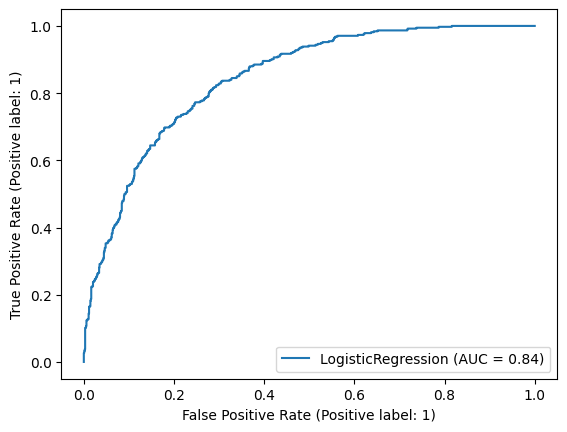

In [18]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(lr, X_test, y_test);

In [19]:
metricas = {
    'model': ['Logistic Regression', 'Logistic Regression'],
    'modo': ['treino', 'teste'],
    'accuracy': [accuracy_score(y_train, lr.predict(X_train)), accuracy_score(y_test, lr.predict(X_test))],
    'balanced_accuracy': [balanced_accuracy_score(y_train, lr.predict(X_train)), balanced_accuracy_score(y_test, lr.predict(X_test))],
    'precision': [precision_score(y_train, lr.predict(X_train)), precision_score(y_test, lr.predict(X_test))],
    'recall': [recall_score(y_train, lr.predict(X_train)), recall_score(y_test, lr.predict(X_test))],
    'f1_score': [f1_score(y_train, lr.predict(X_train)), f1_score(y_test, lr.predict(X_test))],
    'rocauc': [roc_auc_score(y_train, lr.predict_proba(X_train)[:,1]), roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])]

}

pd.DataFrame(metricas)

,model,modo,accuracy,balanced_accuracy,precision,recall,f1_score,rocauc
0,Logistic Regression,treino,0.789118,0.696153,0.631043,0.497659,0.556470,0.833197
1,Logistic Regression,teste,0.800284,0.708766,0.659794,0.513369,0.577444,0.844071
